In [28]:
import pandas as pd
import numbers as np
import datetime as dt
import matplotlib.pyplot as plt

In [29]:
file_path = "../data/raw/NOAA_lightning_strikes_2009_to_2018.csv"
df = pd.read_csv(file_path)

In [46]:
df.describe()

,date,number_of_strikes,x_coord,y_coord,month,year
count,12875911,1.287591e+07,1.287591e+07,1.287591e+07,1.287591e+07,1.287591e+07
mean,2014-04-21 08:02:51.269028352,1.098200e+01,-9.135266e+01,3.426069e+01,6.866055e+00,2.013776e+03
min,2009-01-01 00:00:00,1.000000e+00,-1.418000e+02,1.660000e+01,1.000000e+00,2.009000e+03
25%,2012-04-23 00:00:00,1.000000e+00,-1.017000e+02,2.860000e+01,6.000000e+00,2.012000e+03
50%,2015-05-10 00:00:00,3.000000e+00,-9.120000e+01,3.410000e+01,7.000000e+00,2.015000e+03
75%,2018-03-19 00:00:00,1.000000e+01,-8.130000e+01,3.980000e+01,8.000000e+00,2.018000e+03
max,2018-12-31 00:00:00,2.211000e+03,-4.320000e+01,5.170000e+01,1.200000e+01,2.018000e+03
std,NaN,2.538748e+01,1.330062e+01,7.461390e+00,2.133413e+00,3.284336e+00


In [47]:
df.head(10)

,date,number_of_strikes,x_coord,y_coord,month,year,month_txt
0,2012-09-15,2,-68.8,49.5,9,2012,Sep
1,2012-09-15,2,-85.7,22.8,9,2012,Sep
2,2012-09-15,2,-95.6,25.8,9,2012,Sep
3,2012-09-15,2,-79.5,26.0,9,2012,Sep
4,2012-09-15,2,-88.7,29.1,9,2012,Sep
5,2012-09-15,2,-72.0,47.2,9,2012,Sep
6,2012-09-15,2,-85.9,22.7,9,2012,Sep
7,2012-09-15,2,-71.5,47.6,9,2012,Sep
8,2012-09-15,2,-109.4,28.7,9,2012,Sep
9,2012-09-15,2,-113.4,27.8,9,2012,Sep


In [48]:
df.shape


(12875911, 7)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12875911 entries, 0 to 12875910
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   x_coord            float64       
 3   y_coord            float64       
 4   month              int32         
 5   year               int32         
 6   month_txt          object        
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 589.4+ MB


In [50]:
# Conver date column to datetime
df['date']=pd.to_datetime(df['date'])

In [51]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,x_coord,y_coord,month,year,month_txt
date,,,,,,
2018-08-29,1070457,-2478392.2,880682.0,222016,56003536,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-17,969774,-2637180.6,991134.4,231264,58336344,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-28,917199,-2099159.7,781225.4,188136,47457306,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-27,824589,-2230720.3,871754.6,196128,49473288,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-30,802170,-1853549.2,613870.4,166640,42034940,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-19,786225,-2204877.7,854534.1,199416,50302686,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-18,741180,-2282857.3,823244.2,195976,49434946,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-16,734475,-2309936.9,905120.2,211080,53244930,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...
2018-08-31,723624,-2079633.6,760751.0,187664,47338244,AugAugAugAugAugAugAugAugAugAugAugAugAugAugAugA...


In [52]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,x_coord,y_coord,month,year,month_txt
0,2012-09-15,2,-68.8,49.5,9,2012,Sep
1,2012-09-15,2,-85.7,22.8,9,2012,Sep
2,2012-09-15,2,-95.6,25.8,9,2012,Sep
3,2012-09-15,2,-79.5,26.0,9,2012,Sep
4,2012-09-15,2,-88.7,29.1,9,2012,Sep


In [53]:
df.groupby(['month'])['number_of_strikes'].sum().sort_values(ascending=False).head(12)


month
8     33942354
7     31626594
6     23206108
5     16629739
9     11548371
4      9032998
10     4325239
3      3574222
2      2823641
12     1758939
1      1513532
11     1421580
Name: number_of_strikes, dtype: int64

In [54]:
df['year'] = df['date'].dt.year
df.head()


,date,number_of_strikes,x_coord,y_coord,month,year,month_txt
0,2012-09-15,2,-68.8,49.5,9,2012,Sep
1,2012-09-15,2,-85.7,22.8,9,2012,Sep
2,2012-09-15,2,-95.6,25.8,9,2012,Sep
3,2012-09-15,2,-79.5,26.0,9,2012,Sep
4,2012-09-15,2,-88.7,29.1,9,2012,Sep


In [55]:
# Create a new `month_txt` column.
df['month_txt'] =df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,x_coord,y_coord,month,year,month_txt
0,2012-09-15,2,-68.8,49.5,9,2012,Sep
1,2012-09-15,2,-85.7,22.8,9,2012,Sep
2,2012-09-15,2,-95.6,25.8,9,2012,Sep
3,2012-09-15,2,-79.5,26.0,9,2012,Sep
4,2012-09-15,2,-88.7,29.1,9,2012,Sep


The objective is to plot the total number of strikes per month as a bar graph. To help with the plotting, we will create a new dataframe called df_by_month. This will allow us to easily access the month, month text, and total number of strikes for each month.

In [56]:
# Group by month and month text, sum the number of strikes, and sort by month
df_by_month = df.groupby(['month', 'month_txt'])['number_of_strikes'].sum().reset_index()

# Sort by numerical month order (1-12)
df_by_month = df_by_month.sort_values('month', ascending=True)

# Display the new dataframe
df_by_month


,month,month_txt,number_of_strikes
0,1,Jan,1513532
1,2,Feb,2823641
2,3,Mar,3574222
3,4,Apr,9032998
4,5,May,16629739
5,6,Jun,23206108
6,7,Jul,31626594
7,8,Aug,33942354
8,9,Sep,11548371
9,10,Oct,4325239


Now, let's make a bar chart. Pyplot's `plt.bar()` function takes positional arguments of `x` and `height`, representing the data used for the x- and y- axes, respectively. The x-axis will represent months, and the y-axis will represent strike count.

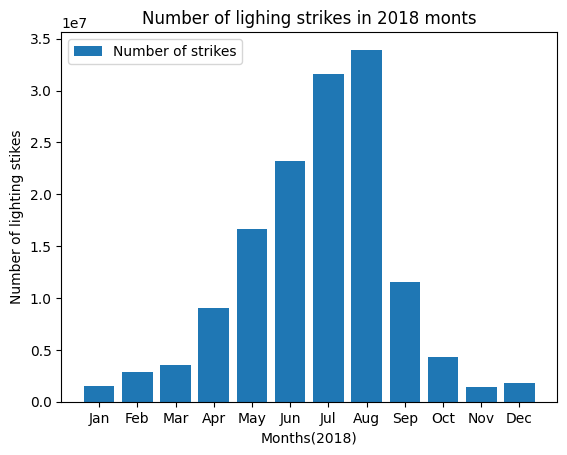

In [57]:
plt.bar(x=df_by_month['month_txt'],height=df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lighting stikes")
plt.title("Number of lighing strikes in 2018 monts")
plt.legend()
plt.show()

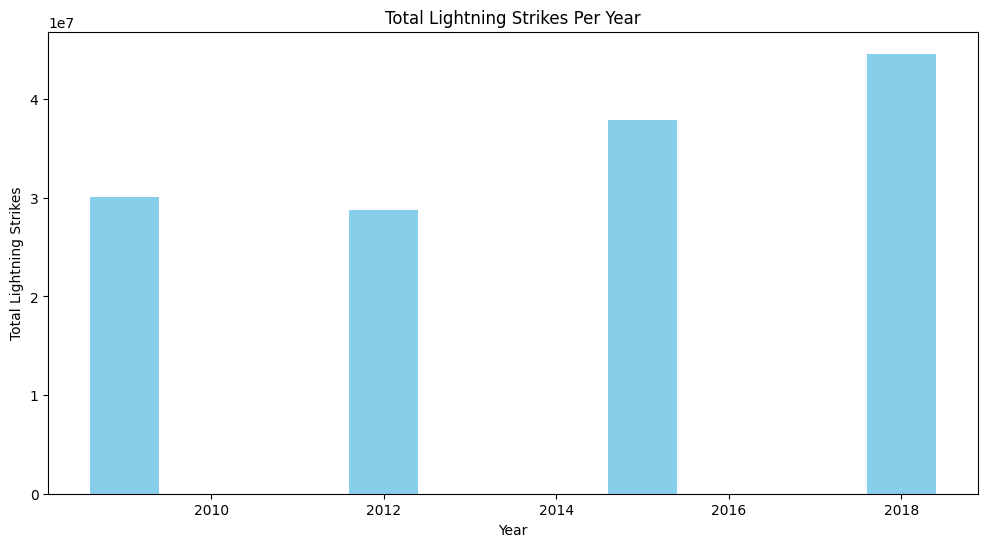

In [58]:
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_by_year['year'], df_by_year['number_of_strikes'], color='skyblue')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Total Lightning Strikes')
plt.title('Total Lightning Strikes Per Year')

# Show the plot
plt.show()

In [59]:
# Extract year from date
df['year'] = df['date'].dt.year

# Group by year and sum the number of strikes
df_by_year = df.groupby('year')['number_of_strikes'].sum().reset_index()

# Sort by year
df_by_year = df_by_year.sort_values('year', ascending=True)

# Display the new dataframe
df_by_year


,year,number_of_strikes
0,2009,30100585
1,2012,28807552
2,2015,37894191
3,2018,44600989


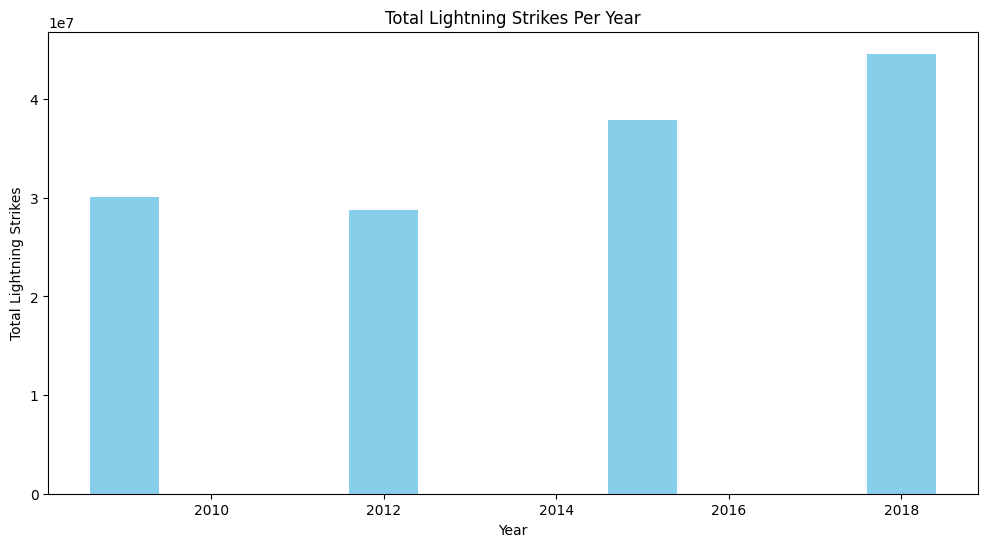

In [60]:

# Create the bar chart


plt.figure(figsize=(12, 6))
plt.bar(df_by_year['year'], df_by_year['number_of_strikes'], color='skyblue')

# Labels and Title
plt.xlabel('Year')
plt.ylabel('Total Lightning Strikes')
plt.title('Total Lightning Strikes Per Year')

# Show the plot
plt.show()
